### INSTACART EXPLORATORY DATA ANALYSIS ###

In [1]:
## import libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## reading data ##

orders = pd.read_csv("G:\Datasets\Instacart\orders.txt")

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
orders.shape

(3421083, 7)

In [3]:
products = pd.read_csv("G:\Datasets\Instacart\products.txt")

In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
products.shape

(49688, 4)

In [4]:
departments = pd.read_csv("G:\Datasets\Instacart\departments.txt")

In [10]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
aisles = pd.read_csv("G:/Datasets/Instacart/aisles.txt")

In [13]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [6]:
previous_order = pd.read_csv("G:\Datasets\Instacart\order_products__prior.txt")

In [15]:
previous_order

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [7]:
last_order = pd.read_csv("G:\Datasets\Instacart\order_products__train.txt")

In [18]:
last_order

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


### Basic Analysis

In [21]:
### How many total orders are in the dataset ###

total_orders = len(orders)
print(total_orders)

3421083


### There are totally 3421083 orders placed

In [26]:
### How many unique users have placed these orders? ###

unique_users = orders.user_id.nunique()
unique_users

206209

### So, there are totally 206209 users have placed over 3 million orders ###

In [40]:
### How often do people usually reorder? ###

reorder_frequency = orders.days_since_prior_order.mean()
print(int(round(reorder_frequency,0)))

11


### On an average people reorder for every 11 days ###

In [36]:
### Average number of orders made by customers ###

orders_per_customer = orders.groupby('user_id').size()
average_orders_per_customer = orders_per_customer.mean()

In [41]:
print(int(round(average_orders_per_customer,0)))

17


### On an average each customer places 17 orders ###

### ORDER AND RE-ORDER ANALYSIS ###

In [50]:
### At what time of the day do most orders occur? ###

hot_hours = orders.order_hour_of_day.value_counts().sort_index()

In [51]:
hot_hours

0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: order_hour_of_day, dtype: int64

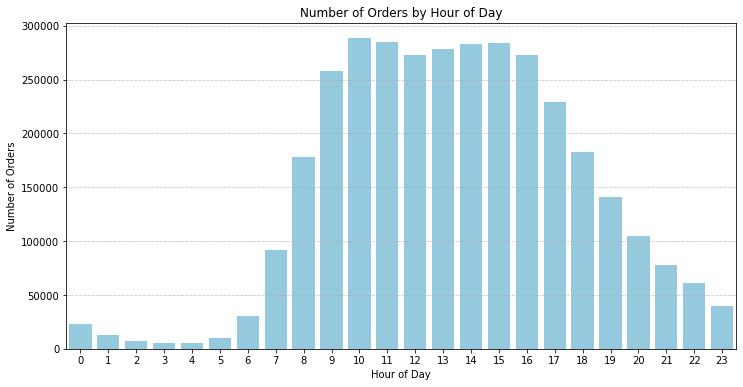

In [59]:
# Creating a DataFrame from the series for easier plotting
hot_hours_df = hot_hours.reset_index()
hot_hours_df.columns = ['Hour of Day', 'Number of Orders']

plt.figure(figsize=(12,6))
sns.barplot(x='Hour of Day', y='Number of Orders', data=hot_hours_df, color='skyblue')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### From the plot it is clear that most orders starts from 7 increasing significantly and decreases by the end of the day ###

In [67]:
### On which day of the week do most orders happen? ###

day_of_week = orders.order_dow.copy()

In [80]:
dow = day_of_week.value_counts().sort_index()

In [81]:
dow_df = dow.reset_index()

In [ ]:
dow_df.columns = ['Day_of_week','Total_orders']

In [85]:
dow_df

,Day_of_week,Total_orders
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339
5,5,453368
6,6,448761


In [86]:
### Let's change day of week from numbers to days 0-> sunday, 1-> monday, 2-> tuesday, 3-> wednesday, 4-> thursday, 5-> friday, 6-> saturday

days = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
dow_df['Day_of_week'] = days

In [87]:
dow_df

,Day_of_week,Total_orders
0,sunday,600905
1,monday,587478
2,tuesday,467260
3,wednesday,436972
4,thursday,426339
5,friday,453368
6,saturday,448761


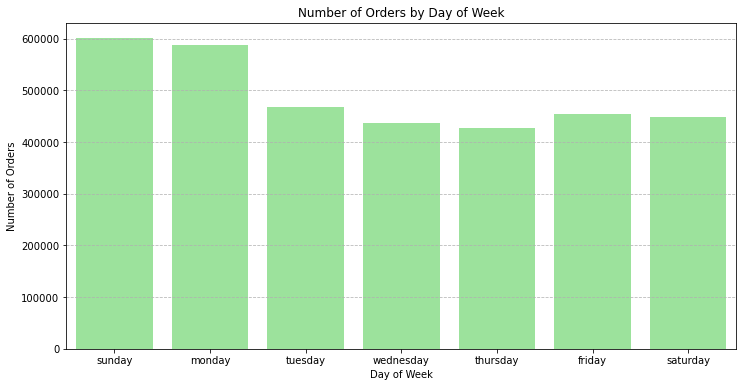

In [95]:
plt.figure(figsize=(12,6))

sns.barplot(x='Day_of_week', y='Total_orders', data = dow_df, color='lightgreen')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

### It is clear that most customers order on sundays ###

In [96]:
# Filtering rows where days_since_prior_order is 7
weekly_orders = orders[orders['days_since_prior_order'] == 7]

# Grouping by user_id and count orders
user_weekly_counts = weekly_orders.groupby('user_id').size()

# Sorting users by their weekly order counts in descending order
sorted_users = user_weekly_counts.sort_values(ascending=False)

# To view the top users who order weekly
print(sorted_users.head())

user_id
118136    51
174620    48
79525     47
109988    46
145611    45
dtype: int64


In [102]:
regular_users = sorted_users[sorted_users>=10]

In [106]:
regular_users.size

5393

### There are totally 5393 users who orders atleast 10 times per week. Taking their purchases into account instacart can provide additional offers to retain their regular customers.

In [10]:
### What's the average reorder rate among all orders? ###

all_orders = pd.concat([previous_order,last_order], ignore_index = True)

In [110]:
all_orders

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [111]:
reordered_count = all_orders['reordered'].sum()

In [112]:
reordered_count

19955360

In [115]:
reorder_rate = (reordered_count/len(all_orders)) * 100

In [117]:
print(round(reorder_rate,2))

59.01


### Customers reorder about 59% of all products ###

In [118]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [8]:
### We want to find what products are reordered frequently ###

products_copy = products.loc[:,['product_id','product_name']].copy()

In [9]:
products_copy

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49684,49685,En Croute Roast Hazelnut Cranberry
49685,49686,Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food


In [11]:
products_all_orders = pd.merge(all_orders,products_copy, on = 'product_id', how = 'inner')

In [12]:
products_all_orders

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2,33120,1,1,Organic Egg Whites
1,26,33120,5,0,Organic Egg Whites
2,120,33120,13,0,Organic Egg Whites
3,327,33120,5,1,Organic Egg Whites
4,390,33120,28,1,Organic Egg Whites
...,...,...,...,...,...
33819101,2269288,27499,31,0,Non-Dairy Coconut Seven Layer Bar
33819102,2507248,27499,9,0,Non-Dairy Coconut Seven Layer Bar
33819103,2271346,37703,15,0,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...
33819104,3004244,43725,25,0,Sweetart Jelly Beans


In [14]:
### Now we have product name we can find top 10 re-ordered products ###

products_and_reorder = products_all_orders.loc[:,['reordered','product_name']]

only_reordered_products = products_and_reorder[products_and_reorder.reordered == 1]

In [21]:
top_reordered_products = only_reordered_products.groupby('product_name').agg('sum').sort_values(by = 'reordered', ascending = False )

In [23]:
top_10 = top_reordered_products.head(10)

In [24]:
top_10

,reordered
product_name,
Banana,415166
Bag of Organic Bananas,329275
Organic Strawberries,214448
Organic Baby Spinach,194939
Organic Hass Avocado,176173
Organic Avocado,140270
Organic Whole Milk,118684
Large Lemon,112178
Organic Raspberries,109688


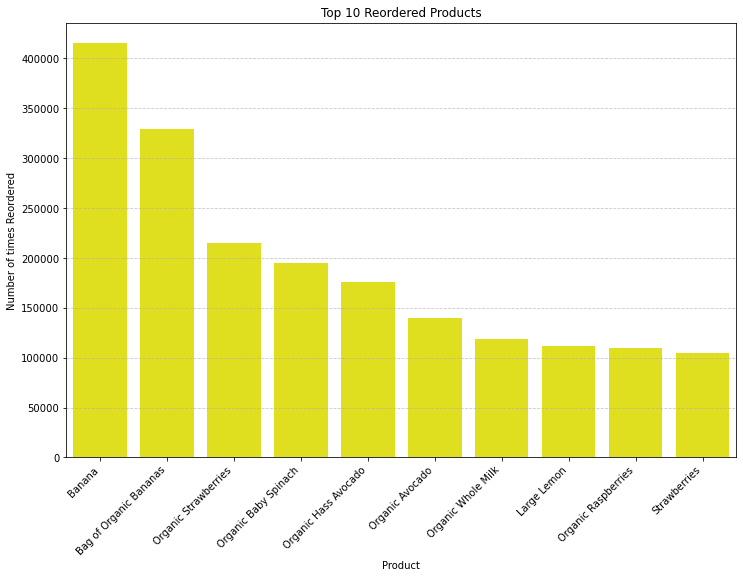

In [30]:
top_10_df = top_10.reset_index()
top_10_df.columns = ['Product', 'Number_of_times_reordered']

plt.figure(figsize=(12,8))
sns.barplot(x='Product', y='Number_of_times_reordered', data=top_10_df, color='yellow')
plt.title('Top 10 Reordered Products')
plt.xlabel('Product')
plt.ylabel('Number of times Reordered')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Since these are the top 10 products reordered frequently, Instacart can provide this analytics to their partners to keep them in stock.

### USER ANALYSIS ###

In [32]:
### How many users are frequent shoppers ###

orders_copy = orders.loc[:,['order_id', 'user_id']]

In [36]:
users = orders_copy.groupby('user_id').agg('count')

In [45]:
frequent_users = users[users['order_id'] >=75] ## setting a threshold more than 75 orders 

In [46]:
len(frequent_users)

3615

### There are 3615 frequent users ###

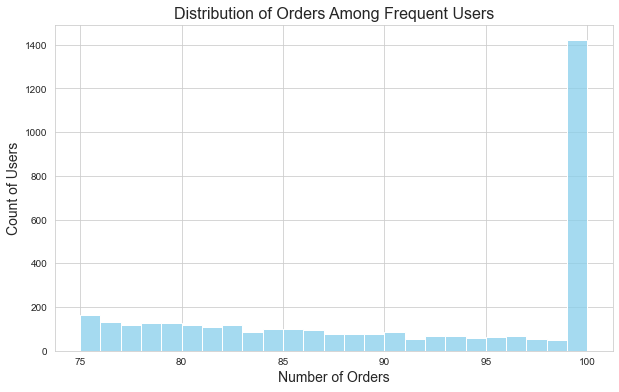

In [48]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(frequent_users['order_id'], kde=False, bins=25, color='skyblue')

plt.title('Distribution of Orders Among Frequent Users', size=16)
plt.xlabel('Number of Orders', size=14)
plt.ylabel('Count of Users', size=14)

plt.show()


In [54]:
### Are there one time shoppers ###

one_time_shoppers = users[users['order_id']==1].count()

In [55]:
one_time_shoppers

order_id    0
dtype: int64

### There are no one time shoppers ###

### PRODUCT ANALYSIS 

In [76]:
### Most oredred products ###

prods = products_all_orders.groupby('product_name').count()

In [84]:
top_10_prods = prods.loc[:,'order_id'].sort_values(ascending = False).head(10)
top_10_prods

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: order_id, dtype: int64

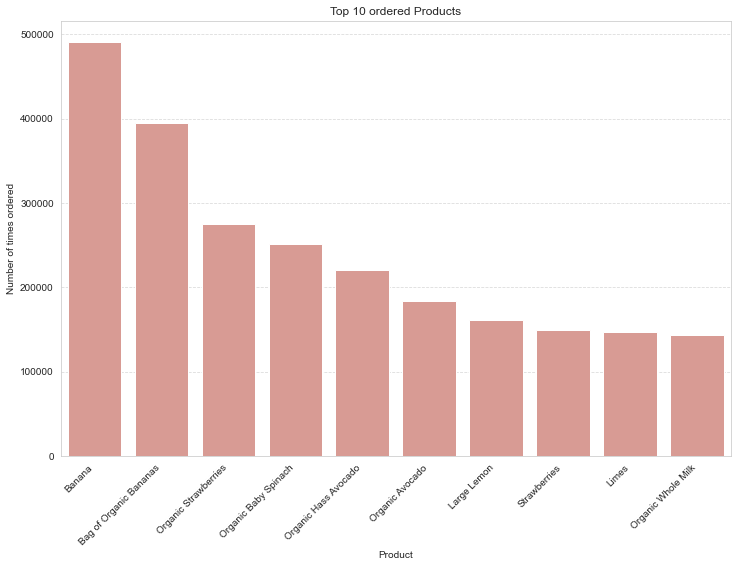

In [91]:
top_10_prods_df = top_10_prods.reset_index()
top_10_prods_df.columns = ['Product', 'Number_of_times_ordered']

plt.figure(figsize=(12,8))
sns.barplot(x='Product', y='Number_of_times_ordered', data=top_10_prods_df, color = 'salmon', saturation = .5)
plt.title('Top 10 ordered Products')
plt.xlabel('Product')
plt.ylabel('Number of times ordered')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1]:
### Orders by departments ###

In [92]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [93]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [97]:
new = pd.merge(products_all_orders,products, on = 'product_id', how = 'inner')

In [101]:
new = pd.merge(new,departments, on = 'department_id', how ='inner')

In [106]:
products_by_department = new.loc[:,'department'].copy()

In [118]:
products_by_department_df = products_by_department.reset_index()
products_by_department_df.columns = ['Count','Department']

In [122]:
final = products_by_department_df.groupby('Department').agg('count').sort_values(by = 'Count', ascending = False)

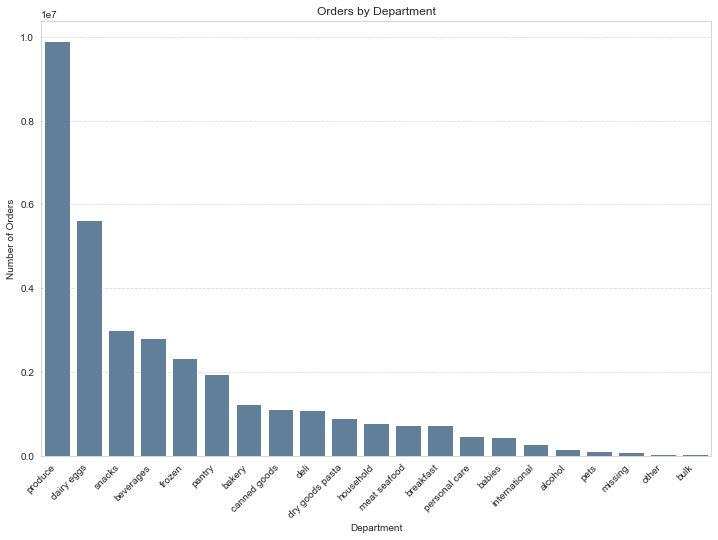

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(x='Department', y='Count', data= final, color = 'steelblue', saturation = .5)
plt.title('Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [130]:
### Are there particular days or times when specific products are ordered more frequently? ###

products_days = pd.merge(orders,all_orders, on = 'order_id', how = 'inner')

In [132]:
## Dropping few columns to increase execution speed ###

products_days.drop(['user_id','eval_set','order_number','days_since_prior_order', 'add_to_cart_order','reordered'], axis = 1, inplace = True)

In [135]:
final_products = pd.merge(products_days,products, on = 'product_id', how = 'inner')

In [136]:
final_products

,order_id,order_dow,order_hour_of_day,product_id,product_name,aisle_id,department_id
0,2539329,2,8,196,Soda,77,7
1,2398795,3,7,196,Soda,77,7
2,473747,3,12,196,Soda,77,7
3,2254736,4,7,196,Soda,77,7
4,431534,4,15,196,Soda,77,7
...,...,...,...,...,...,...,...
33819101,1320836,2,15,43553,Orange Energy Shots,64,7
33819102,31526,5,11,43553,Orange Energy Shots,64,7
33819103,758936,2,7,42338,"Zucchini Chips, Pesto",50,19
33819104,2745165,3,5,42338,"Zucchini Chips, Pesto",50,19


In [146]:
### Changing day values ###

day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

final_products['order_dow'] = final_products['order_dow'].map(day_mapping)

In [147]:
final_products

,order_id,order_dow,order_hour_of_day,product_id,product_name,aisle_id,department_id
0,2539329,Tuesday,8,196,Soda,77,7
1,2398795,Wednesday,7,196,Soda,77,7
2,473747,Wednesday,12,196,Soda,77,7
3,2254736,Thursday,7,196,Soda,77,7
4,431534,Thursday,15,196,Soda,77,7
...,...,...,...,...,...,...,...
33819101,1320836,Tuesday,15,43553,Orange Energy Shots,64,7
33819102,31526,Friday,11,43553,Orange Energy Shots,64,7
33819103,758936,Tuesday,7,42338,"Zucchini Chips, Pesto",50,19
33819104,2745165,Wednesday,5,42338,"Zucchini Chips, Pesto",50,19


In [171]:
# Group by product_name and order_dow to count the frequency of orders for each product on each day.
product_day_frequency = final_products.groupby(['product_name', 'order_dow'])['order_id'].count().reset_index(name='order_count')
top_products_by_day = product_day_frequency[product_day_frequency['order_count'] > 20000]

In [172]:
top_products_by_day

,product_name,order_dow,order_count
22084,Bag of Organic Bananas,Friday,50545
22085,Bag of Organic Bananas,Monday,72206
22086,Bag of Organic Bananas,Saturday,51443
22087,Bag of Organic Bananas,Sunday,75052
22088,Bag of Organic Bananas,Thursday,46358
...,...,...,...
209932,Organic Yellow Onion,Sunday,27200
210201,Organic Zucchini,Sunday,25202
276383,Strawberries,Monday,26349
276384,Strawberries,Saturday,20024


C:\Users\91790\AppData\Local\Temp/ipykernel_24156/714237485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_by_day['order_count'] = top_products_by_day['order_count'].astype(int)


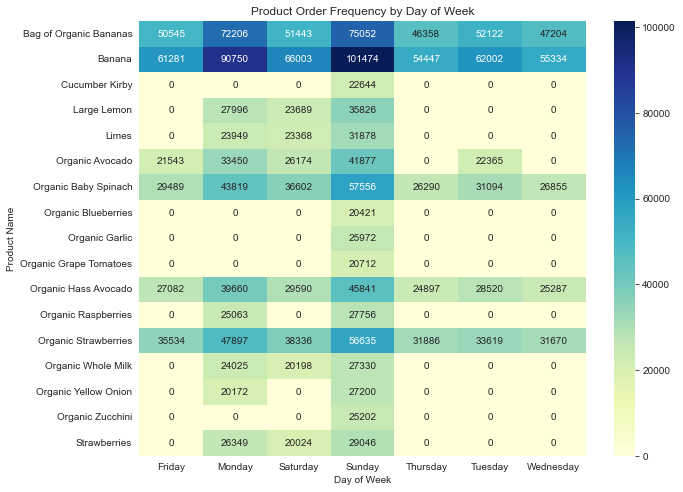

In [173]:
top_products_by_day['order_count'] = top_products_by_day['order_count'].astype(int)

product_day_pivot = top_products_by_day.pivot("product_name", "order_dow", "order_count").fillna(0).astype(int)

plt.figure(figsize=(10, 8))
sns.heatmap(product_day_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Product Order Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Product Name')
plt.show()
